In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [45]:
df=[[2.00,2.00],[5.5,4.0],[5.0,5.0],[1.5,2.5],[1.0,1.0],[7.0,5.0],[5.75,6.5]]
ctys=['1','2','3','4','5','6','7']
data=pd.DataFrame(df,columns=['var1','var2'],index=ctys)
data

,var1,var2
1,2.00,2.0
2,5.50,4.0
3,5.00,5.0
4,1.50,2.5
5,1.00,1.0
6,7.00,5.0
7,5.75,6.5


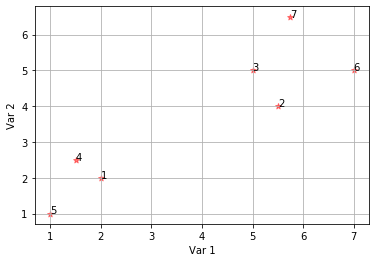

In [46]:
x=data['var1']
y=data['var2']
n=range(1,8)
fig,ax=plt.subplots()
ax.scatter(x,y,marker='*',c='red',alpha=0.5)
plt.grid()
plt.xlabel("Var 1")
plt.ylabel("Var 2")
for i,txt in enumerate(n):
    ax.annotate(txt,(x[i],y[i]))

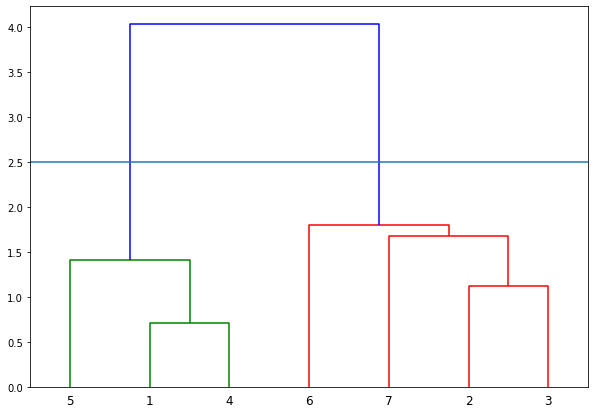

In [47]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
linked=linkage(data,'single')
labelList=range(1,8)
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.axhline(y=2.5)
plt.show()

In [48]:
import sklearn
from sklearn.cluster import AgglomerativeClustering
k=2
HAC=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='single')
HAC.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [49]:
HAC.fit_predict(data)

array([1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [50]:
print(HAC.labels_)

[1 0 0 1 1 0 0]


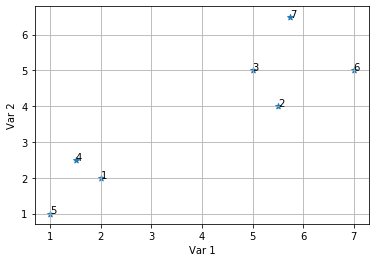

In [51]:
x=data['var1']
y=data['var2']
n=range(1,8)
fig,ax=plt.subplots()
ax.scatter(x,y,marker='*',cmap='rainbow')
plt.grid()
plt.xlabel("Var 1")
plt.ylabel("Var 2")
for i,txt in enumerate(n):
    ax.annotate(txt,(x[i],y[i]))

In [53]:
df=[['youth','high','no','fair','no'],['youth','high','no','excellent','no'],['middle','high','no','fair','yes'],['senior','medium','no','fair','yes'],['senior','low','yes','fair','yes'],['senior','low','yes','excellent','no'],['middle','low','yes','excellent','yes']]
ctys=['1','2','3','4','5','6','7']
data=pd.DataFrame(df,columns=['age','income','student','credit_rating','buys_computer'],index=ctys)
data

,age,income,student,credit_rating,buys_computer
1,youth,high,no,fair,no
2,youth,high,no,excellent,no
3,middle,high,no,fair,yes
4,senior,medium,no,fair,yes
5,senior,low,yes,fair,yes
6,senior,low,yes,excellent,no
7,middle,low,yes,excellent,yes


In [54]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [56]:
le_age=LabelEncoder()
le_income=LabelEncoder()
le_student=LabelEncoder()
le_credit_rating=LabelEncoder()
le_buys_computer=LabelEncoder()

In [57]:
data['age_n']=le_age.fit_transform(data['age'])
data['income_n']=le_age.fit_transform(data['income'])
data['student_n']=le_age.fit_transform(data['student'])
data['credit_rating_n']=le_age.fit_transform(data['credit_rating'])
data['buys_computer_n']=le_age.fit_transform(data['buys_computer'])

In [70]:
data.head()

,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
1,youth,high,no,fair,no,2,0,0,1,0
2,youth,high,no,excellent,no,2,0,0,0,0
3,middle,high,no,fair,yes,0,0,0,1,1
4,senior,medium,no,fair,yes,1,2,0,1,1
5,senior,low,yes,fair,yes,1,1,1,1,1


In [71]:
data_new=data.drop(['age','income','student','credit_rating','buys_computer'],axis='columns')
data_new.head()

,age_n,income_n,student_n,credit_rating_n,buys_computer_n
1,2,0,0,1,0
2,2,0,0,0,0
3,0,0,0,1,1
4,1,2,0,1,1
5,1,1,1,1,1


In [72]:
feature_cols=['age_n','income_n','student_n','credit_rating_n']
x=data_new.drop(['buys_computer_n'],axis='columns')
y=data_new['buys_computer_n']

In [73]:
x.head()

,age_n,income_n,student_n,credit_rating_n
1,2,0,0,1
2,2,0,0,0
3,0,0,0,1
4,1,2,0,1
5,1,1,1,1


In [74]:
y.head()

1    0
2    0
3    1
4    1
5    1
Name: buys_computer_n, dtype: int32

In [75]:

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
dt=clf.fit(x,y)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import PydotPlus


ModuleNotFoundError: No module named 'PydotPlus'

In [80]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getValue())
graph.write_png('buys_computer.png')
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [86]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
dt=clf.fit(x_train,y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
#accuracy check
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.5
